In [1]:
# Librerie per manipolazione dati
import pandas as pd           # Analisi e manipolazione dati strutturati
import numpy as np           # Calcoli numerici e operazioni matematiche

# Librerie per visualizzazione
import matplotlib.pyplot as plt  # Creazione di grafici base
import seaborn as sns           # Visualizzazioni statistiche avanzate

# Librerie per Machine Learning
from sklearn.model_selection import train_test_split  # Divisione dataset train/test
from sklearn.compose import ColumnTransformer         # Preprocessing colonne diverse
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # Encoding e scaling
from sklearn.pipeline import Pipeline                 # Creazione pipeline ML
from sklearn.linear_model import LinearRegression     # Modello di regressione lineare
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Metriche

In [10]:
# caricamento del dataset
df = pd.read_csv('/home/giovanni/Programs/Python3/DataAnalyst-course/Esercizi/Giorno 13/dataset_case.csv')

# Visualizzazione delle prime righe del dataset
display(df.head())
print(f"Numero di righe: {df.shape[0]}, Numero di colonne: {df.shape[1]}")

,superficie,stanze,eta,prezzo
0,106.181018,1,25.409939,206138.491509
1,192.607146,4,34.790640,403141.859090
2,159.799091,5,42.917940,333661.362613
3,139.798773,4,16.297945,327976.770774
4,73.402796,6,11.012052,210279.200314


Numero di righe: 100, Numero di colonne: 4


In [3]:
X = df.drop(columns=['prezzo'])  # Caratteristiche (tutte le colonne tranne 'target')
y = df['prezzo']  # Variabile target

# Divisione del dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()  # Inizializzazione del modello di regressione lineare
model.fit(X_train, y_train)  # Addestramento del modello

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
y_pred = model.predict(X_test)  # Predizione sui dati di test
# Calcolo delle metriche di valutazione
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Valutazione del modello:")
print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

Valutazione del modello:
R^2: 0.9873
MAE: 8837.0781
MSE: 103225888.8554


In [5]:
coefficients = model.coef_
intercept = model.intercept_
print("Coefficiente angolare (pendenza):", coefficients)
print("Intercetta (termine indipendente):", intercept)

Coefficiente angolare (pendenza): [ 2066.41894177 14981.12724376 -1067.95163613]
Intercetta (termine indipendente): -5444.915904961468


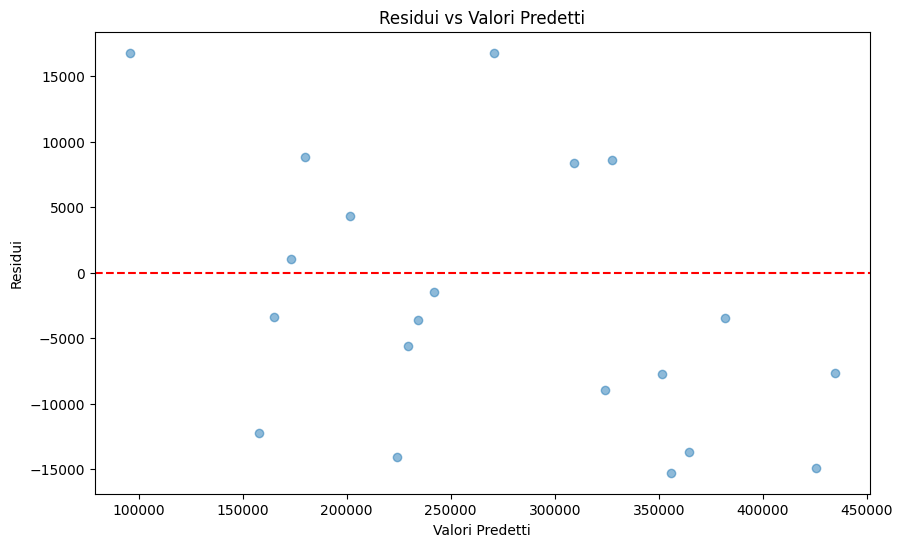

In [6]:
# plot dei residui
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residui vs Valori Predetti')
plt.xlabel('Valori Predetti')
plt.ylabel('Residui')
plt.show()

In [14]:
# test del modello su input dell'utente

# while True: # commentato per evitare blocco del notebook
#     user_input = input("Inserisci i valori delle caratteristiche separati da virgola (o 'exit' per uscire): ")
#     if user_input.lower() == 'exit':
#         break
#     try:
#         input_values = [float(x) for x in user_input.split(',')]
#         if len(input_values) != X.shape[1]:
#             print(f"Errore: Devi inserire {X.shape[1]} valori.")
#             continue
#         input_df = pd.DataFrame([input_values], columns=X.columns)
#         prediction = model.predict(input_df)
#         print(f"Predizione per i valori inseriti: {prediction[0]}")
#     except ValueError:
#         print("Errore: Assicurati di inserire numeri validi separati da virgola.")
#     except Exception as e:
#         print(f"Errore: {e}")

user_input = pd.DataFrame({
    'superficie': [80],
    'stanze': [5],
    'eta': [20],
})
prediction = model.predict(user_input)
print(f"Predizione per i valori inseriti: {prediction[0]:.2f} €")

Predizione per i valori inseriti: 213415.20 €
